In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import integrate
from scipy import optimize
from scipy import interpolate
from sklearn.linear_model import Ridge
plt.style.use('ggplot')

def fhn_equation(t, x, *args):
    """
    Returns the FitzHugh-Nagumo differential equation.
    Should receive three parameters (C, a, b)
    """
    V = x[0]
    R = x[1]
    C = args[0]
    a = args[1]
    b = args[2]
    return [C*(V-V**3/3+R), -1/C*(V-a+b*R)]

def add_noise(data, sigma):
    """
    Adds Gaussian noise with mean 0 and standard deviation sigma
    to each entry of the given data
    """
    return data + np.random.normal(scale=sigma, size=np.shape(data))

def clean_data(data, eps):
    """
    Reduces to zero the entries of data with value < eps
    """
    data[data < eps] = 0
    return data

In [40]:
# ODE Parameters
C1=3
a1=0.34
b1=0.2
params1 = (C1,a1,b1)

C2 = 3
a2 = 0.58
b2 = 0.58
params2 = (C2,a2,b2)

# Additional conditions
v0 = -1
r0 = 1

# Time points
t0 = 0
tf = 20
h = 0.1
t_points = np.arange(t0,tf+h,h)

# Noise parameters
sigma1 = 0.05
sigma2 = 0.1
sigma3 = 0.15

# Data generation and stuff
sol_fhn1 = integrate.solve_ivp(fhn_equation, (t0,tf), (v0,r0), args=params1, t_eval=t_points)
sol_fhn2 = integrate.solve_ivp(fhn_equation, (t0,tf), (v0,r0), args=params2, t_eval=t_points)

data_fhn11 = add_noise(sol_fhn1.y, sigma1)
data_fhn12 = add_noise(sol_fhn1.y, sigma2)
data_fhn13 = add_noise(sol_fhn1.y, sigma3)

data_fhn21 = add_noise(sol_fhn2.y, sigma1)
data_fhn22 = add_noise(sol_fhn2.y, sigma2)
data_fhn23 = add_noise(sol_fhn2.y, sigma3)

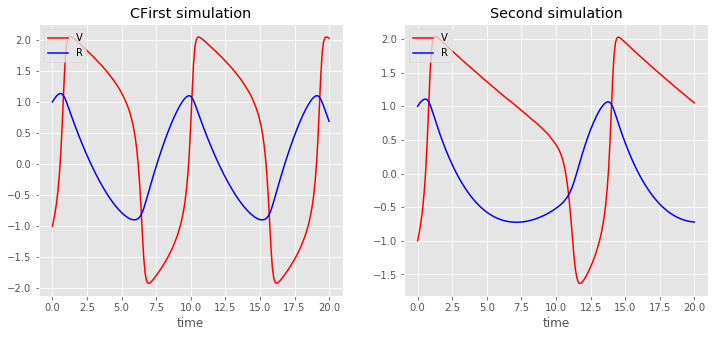

In [126]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
ax0.plot(t_points, sol_fhn1.y[0], '-r', label='V')
ax0.plot(t_points, sol_fhn1.y[1], '-b', label='R')
ax0.set_title('CFirst simulation')
ax0.set_xlabel('time')
ax0.legend(loc='upper left')
ax1.plot(t_points, sol_fhn2.y[0], '-r', label='V')
ax1.plot(t_points, sol_fhn2.y[1], '-b', label='R') 
ax1.set_title('Second simulation')
ax1.set_xlabel('time')
ax1.legend(loc='upper left')
plt.show()